# CIA Country Analysis and Clustering


Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Goal

The objective of this project is to gain insights into the similarities between countries and regions around the world by applying K-Means clustering. By experimenting with different numbers of clusters, we aim to explore what these groupings represent and uncover meaningful patterns in the data.

> **Key Question:**  
> What do these clusters reveal about the relationships among countries and regions?

----

## Imports and Data

Run the following cells to import the necessary libraries and load the dataset for analysis.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from pandas.plotting import parallel_coordinates
import plotly.express as px

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

### Data Overview

Exploring the rows and columns of the dataset, and examining the data types for each column.

In [3]:
df = pd.read_csv('DATA/CIA_Country_Facts.csv')

In [4]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [ ]:
df.describe().transpose()

## Exploratory Data Analysis

In this section, we are conducting an in-depth exploratory data analysis (EDA) to gain a comprehensive understanding of the dataset. This includes visualizing the distributions of key features, examining relationships between variables, and identifying any notable trends or anomalies. Through these visualizations, we aim to uncover important insights about the data that will guide our approach to clustering and help ensure the quality and relevance of our analysis.

### Count Plot of Countries by Region

We are creating a count plot to show the number of countries in each region. This visualization provides a quick overview of how countries are distributed across different regions in the dataset.

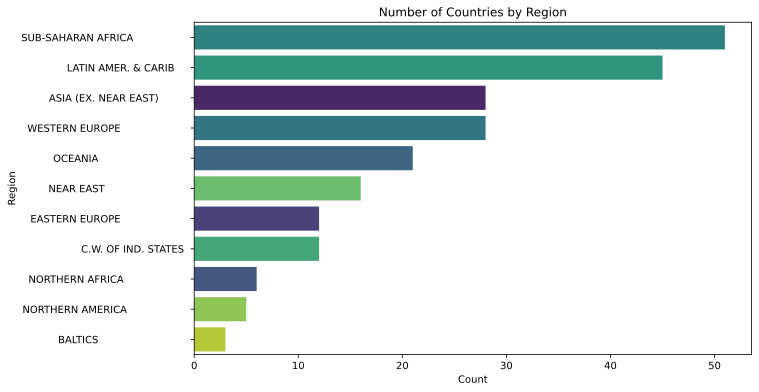

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Region', order=df['Region'].value_counts().index, hue='Region', palette='viridis')
plt.title('Number of Countries by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.savefig('visualisations/countries_by_region.svg')

### Visualizing Population Distribution

We are creating a histogram to explore the distribution of population sizes across countries. This visualization helps us identify the range, central tendency, and any skewness in the population data, as well as highlight countries with exceptionally large or small populations.

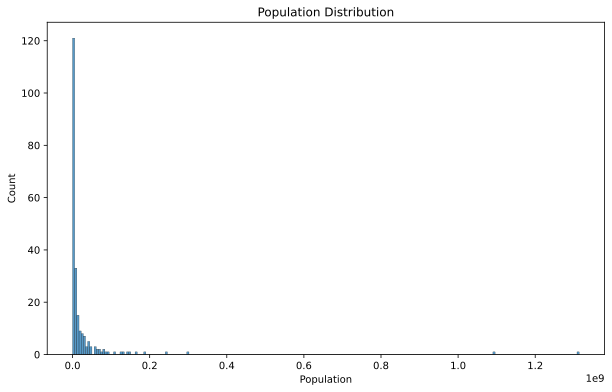

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Population')
plt.title('Population Distribution')
plt.savefig('visualisations/Population_Distribution.svg')


### Focusing on Countries with Smaller Populations

You should have noticed that the initial population histogram is heavily skewed due to a few countries with extremely large populations. To get a clearer view of the distribution for most countries, we are resetting the X axis to show only those with populations less than 0.5 billion (500 million).

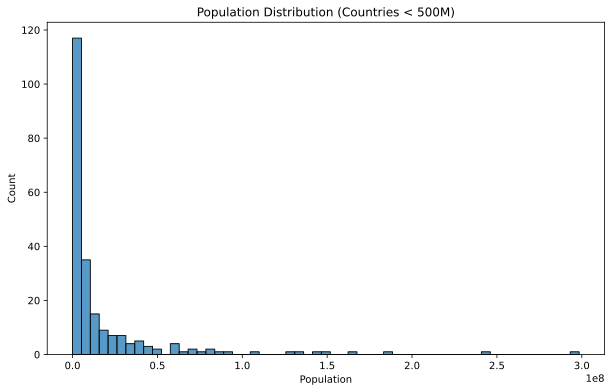

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(data=df[df['Population']<500000000],x='Population')
plt.title('Population Distribution (Countries < 500M)')
plt.savefig('visualisations/Population_Distribution_under_500M.svg')

### Histogram of GDP per Capita

We are creating a histogram to visualize the distribution of GDP per capita across countries. This plot helps us understand the range and frequency of different economic levels in the dataset.

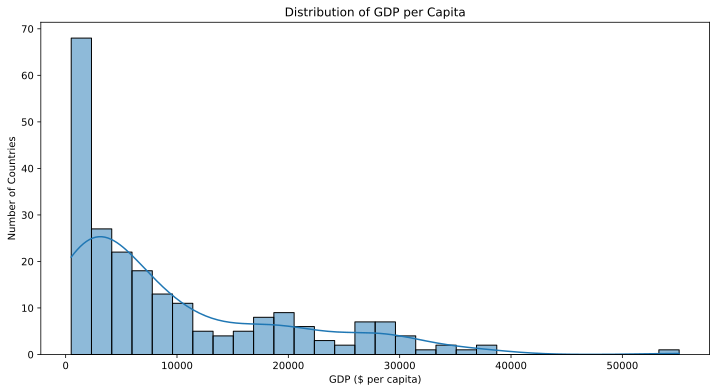

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='GDP ($ per capita)', bins=30, kde=True)
plt.title('Distribution of GDP per Capita')
plt.xlabel('GDP ($ per capita)')
plt.ylabel('Number of Countries')
plt.savefig('visualisations/gdp_distribution.svg')

### Bar Plot of Top 10 Most Populous Countries

We are generating a bar plot to display the ten countries with the largest populations. This visualization allows us to easily identify which countries have the highest population counts.


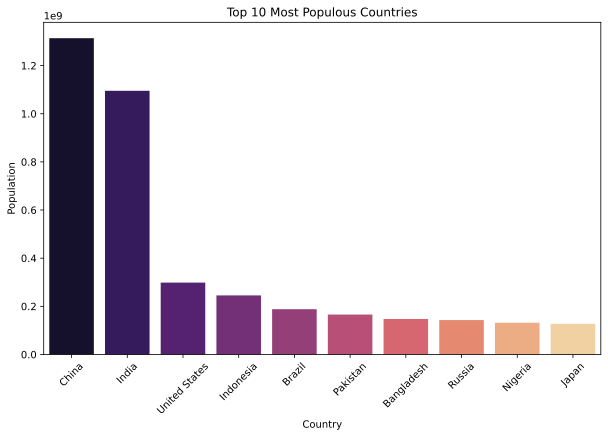

In [42]:
top_pop = df.nlargest(10, 'Population')
plt.figure(figsize=(10,6))
sns.barplot(data=top_pop, x='Country', y='Population',hue='Country',palette='magma')
plt.title('Top 10 Most Populous Countries')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.savefig('visualisations/top_populous_countries.svg')

### Comparing Mean GDP per Capita by Region

We are exploring the relationship between GDP per capita and region by creating a bar chart that displays the mean GDP per capita for each region. The black bars on the chart represent the standard deviation, providing insight into the variability of GDP within each region.

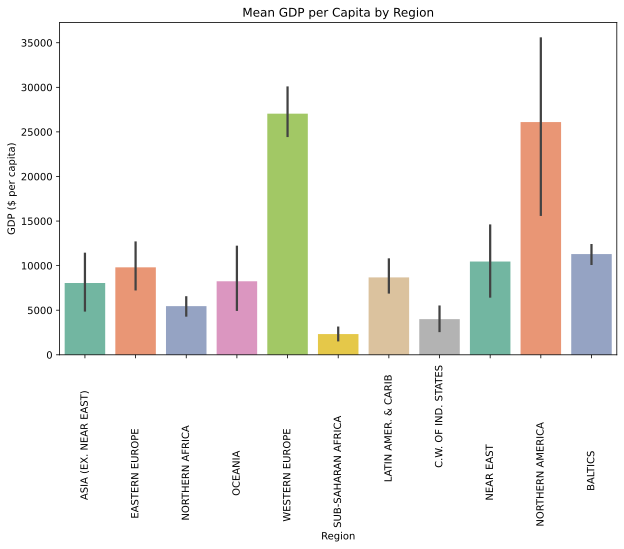

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,y='GDP ($ per capita)',x='Region',estimator=np.mean,hue='Region',palette='Set2')
plt.xticks(rotation=90);
plt.title('Mean GDP per Capita by Region')
plt.savefig('visualisations/mean_gdp_per_capita_by_region.svg')


### Exploring the Relationship Between Phone Access and GDP

We are creating a scatterplot to examine the relationship between the number of phones per 1000 people and GDP per capita. Each point represents a country, and the points are colored by region to help identify regional patterns or clusters in economic development and technology access.

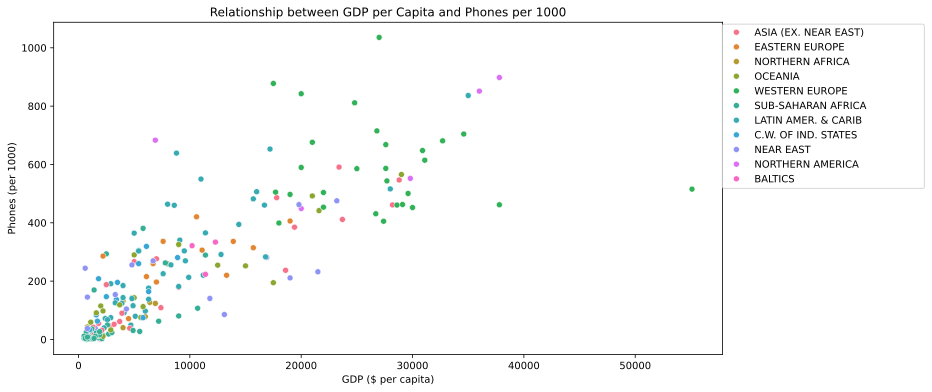

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Phones (per 1000)',hue='Region')
plt.legend(loc=(1,0.5))
plt.title('Relationship between GDP per Capita and Phones per 1000')
plt.savefig('visualisations/gdp_vs_phones_per_1000.svg')


### Investigating the Relationship Between GDP per Capita and Literacy

We are creating a scatterplot to explore the relationship between GDP per capita and literacy rates across countries. Each point represents a country and is colored by region, allowing us to identify regional trends and clusters. This visualization helps us assess whether higher literacy rates are associated with greater economic prosperity, and to observe any notable patterns or outliers among different regions.

After examining the plot, consider what conclusions can be drawn about the connection between literacy and economic development across the world.

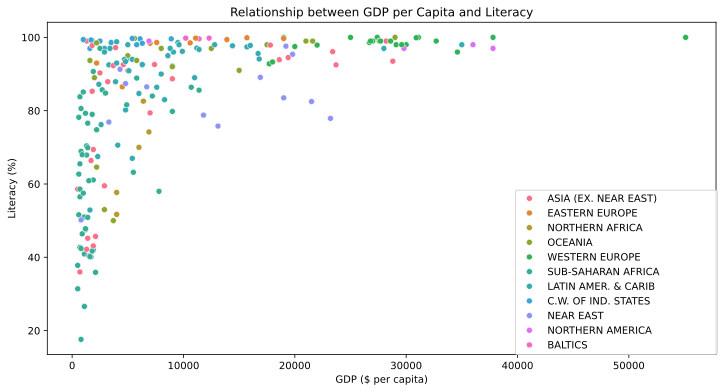

In [26]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Literacy (%)',hue='Region')
plt.legend(loc=(0.7,0))
plt.title('Relationship between GDP per Capita and Literacy')
plt.savefig('visualisations/gdp_vs_literacy.svg')

### Visualizing Feature Correlations with a Heatmap

We are generating a heatmap to visualize the correlation coefficients between the numerical columns in the DataFrame. This allows us to quickly identify strong positive or negative relationships among features, as well as detect patterns or redundancies in the data that may influence our clustering analysis.

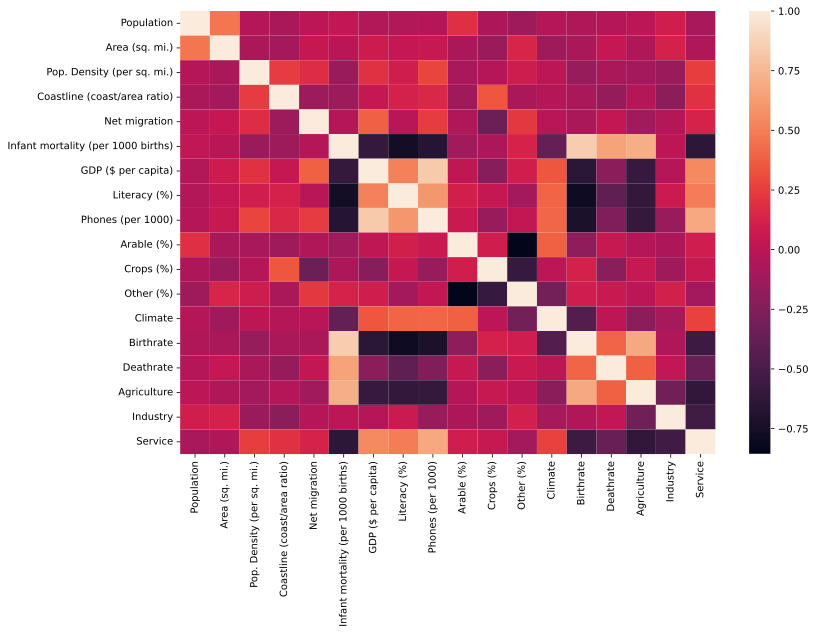

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr())
plt.savefig('visualisations/correlation_heatmap.svg')

### Exploring Correlation Patterns with a Clustermap

We are using Seaborn’s `clustermap()` function to visualize the correlation matrix with hierarchical clustering. This approach groups together features that are highly correlated, allowing us to identify clusters of related variables and better understand the underlying structure of the dataset.

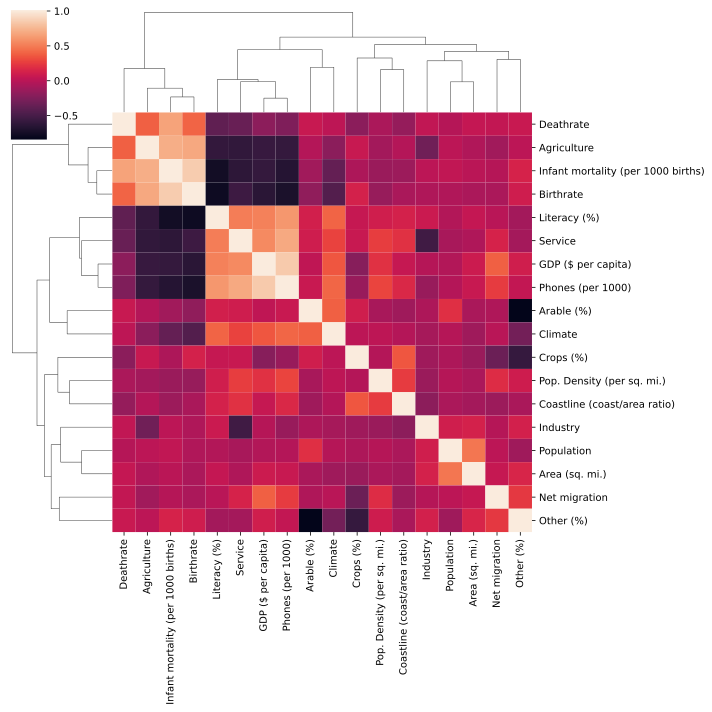

In [32]:
sns.clustermap(df.select_dtypes(include=['int64', 'float64']).corr())
plt.savefig('visualisations/correlation_clustermap.svg')

### Pairplot for Multivariate Relationships

We are using a pairplot to visualize pairwise relationships between several key numerical features, colored by region. This plot allows us to observe trends, correlations, and potential clusters across multiple variables simultaneously.

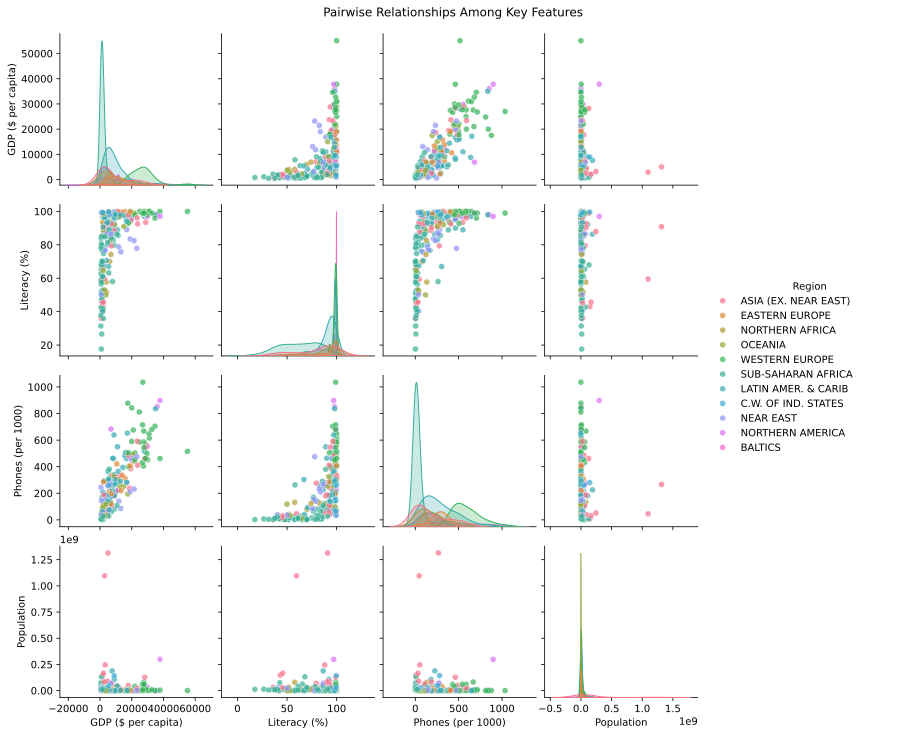

In [34]:
sns.pairplot(df, vars=['GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Population'], hue='Region', plot_kws={'alpha':0.7})
plt.suptitle('Pairwise Relationships Among Key Features', y=1.02)
plt.savefig('visualisations/pairplot.svg')


### Parallel Coordinates Plot for Regional Comparison

We are creating a parallel coordinates plot to compare the profiles of different regions across several features. Each line represents a country, and the axes show normalized values of selected features. This visualization helps us identify patterns and outliers within and between regions.

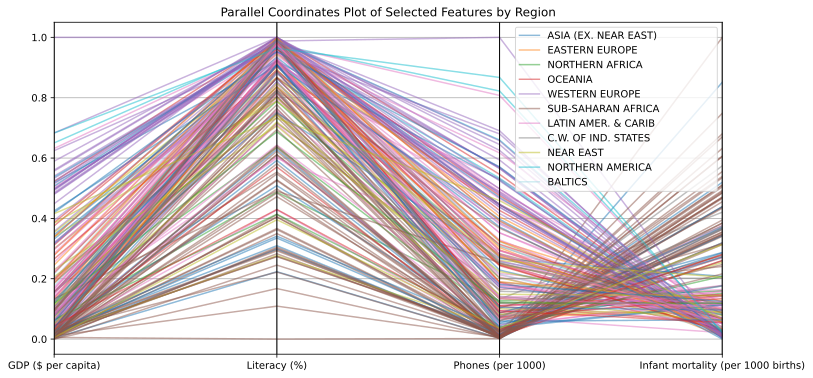

In [35]:
from pandas.plotting import parallel_coordinates

# Select and normalize relevant columns
cols = ['Region', 'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Infant mortality (per 1000 births)']
df_norm = df[cols].dropna()
for col in cols[1:]:
    df_norm[col] = (df_norm[col] - df_norm[col].min()) / (df_norm[col].max() - df_norm[col].min())

plt.figure(figsize=(12,6))
parallel_coordinates(df_norm, 'Region', colormap=plt.get_cmap("tab20"), alpha=0.5)
plt.title('Parallel Coordinates Plot of Selected Features by Region')
plt.savefig('visualisations/parallel_coordinates.svg')

-----

## Data Preparation and Model Discovery

We are now preparing our data for KMeans clustering by addressing any issues that could affect model performance.

### Handling Missing Data

We are reporting the number of missing elements in each column to assess data quality and determine if further cleaning or imputation is necessary before proceeding.

In [51]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

### Filling Missing Agriculture Values

You should have noticed that most of the countries with missing values in the Agriculture column are tiny islands, with the exception of Greenland and Western Sahara. Since these countries are either very small or essentially non-existent in terms of agricultural activity, we are filling their missing Agriculture values with 0. In total, there should be 15 countries for which this operation is performed.


In [723]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

**TASK: You should have noticed most of these countries are tiny islands, with the exception of Greenland and Western Sahara. Go ahead and fill any of these countries missing NaN values with 0, since they are so small or essentially non-existant. There should be 15 countries in total you do this for.
    

In [57]:
# REMOVAL OF TINY ISLANDS
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

### Rechecking for Missing Data

We are now counting the number of missing elements in each feature again to confirm that all intended missing values have been addressed and to identify any remaining data quality issues before proceeding with further analysis.

In [58]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

### Imputing Missing Climate Values by Region

We are noticing that the Climate feature is missing for a few countries, but the Region information is available for all entries. To address this, we are filling in the missing Climate values using the mean climate value for each respective region. This approach leverages regional similarities to provide a reasonable estimate for the missing data.

In [59]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

**Check again on many elements are missing:**

In [60]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

### Imputing Missing Literacy Percentage Values by Region

We are observing that some countries have missing values for Literacy (%). To address this, we are applying the same approach used for the Climate feature: filling in any missing Literacy (%) values with the mean Literacy (%) of the corresponding region. This method ensures that the imputed values are contextually appropriate based on regional characteristics.

In [61]:
df[df['Literacy (%)'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976.0,51129.0,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
66,Faroe Islands,WESTERN EUROPE,47246.0,1399.0,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,3.1,14.05,8.70,0.270,0.110,0.620
74,Gaza Strip,NEAR EAST,1428757.0,360.0,3968.8,11.11,1.60,22.93,600.0,NaN,244.3,28.95,21.05,50.00,3.0,39.45,3.80,0.030,0.283,0.687
85,Guernsey,WESTERN EUROPE,65409.0,78.0,838.6,64.10,3.84,4.71,20000.0,NaN,842.4,NaN,NaN,NaN,3.0,8.81,10.01,0.030,0.100,0.870
99,Isle of Man,WESTERN EUROPE,75441.0,572.0,131.9,27.97,5.36,5.93,21000.0,NaN,676.0,9.00,0.00,91.00,3.0,11.05,11.19,0.010,0.130,0.860
104,Jersey,WESTERN EUROPE,91084.0,116.0,785.2,60.34,2.76,5.24,24800.0,NaN,811.3,0.00,0.00,100.00,3.0,9.30,9.28,0.050,0.020,0.930
108,Kiribati,OCEANIA,105432.0,811.0,130.0,140.94,0.00,48.52,800.0,NaN,42.7,2.74,50.68,46.58,2.0,30.65,8.26,0.089,0.242,0.668
123,Macedonia,EASTERN EUROPE,2050554.0,25333.0,80.9,0.00,-1.45,10.09,6700.0,NaN,260.0,22.26,1.81,75.93,3.0,12.02,8.77,0.118,0.319,0.563
185,Slovakia,EASTERN EUROPE,5439448.0,48845.0,111.4,0.00,0.30,7.41,13300.0,NaN,220.1,30.16,2.62,67.22,3.0,10.65,9.45,0.035,0.294,0.672
187,Solomon Islands,OCEANIA,552438.0,28450.0,19.4,18.67,0.00,21.29,1700.0,NaN,13.4,0.64,2.00,97.36,2.0,30.01,3.92,0.420,0.110,0.470


In [62]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

**Check again on the remaining missing values:**

In [63]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

### Handling Remaining Missing Values

At this stage, we are left with only a few countries that still have missing values. For simplicity and to maintain data quality, we are choosing to drop these countries from the dataset. Alternatively, you may fill in these remaining values using any preferred imputation method if desired.

In [64]:
df = df.dropna()

## Data Feature Preparation

We are now preparing the dataset for clustering. The Country column serves as a unique identifier for each entry and does not provide useful information for clustering analysis. Therefore, we are dropping the Country column from the dataset before proceeding.

In [65]:
X = df.drop("Country",axis=1)

### Creating the Feature Matrix for Clustering

We are now constructing the feature matrix `X` for clustering. Since the Region column contains categorical string values, we are using Pandas to generate dummy variables for each region. This approach allows us to include region information in a numerical format, resulting in a finalized `X` matrix that consists of continuous features along with the region dummy variables.

In [66]:
X = pd.get_dummies(X)

In [67]:
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997.0,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,False,False,False,False,False,False,False,False,False,False
1,3581655.0,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,False,False,True,False,False,False,False,False,False,False
2,32930091.0,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,False,False,False,False,False,True,False,False,False,False
3,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,...,False,False,False,False,False,False,False,False,False,False
4,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,...,False,False,False,False,False,False,False,False,False,False


### Scaling

### Scaling the Feature Matrix

We are scaling the feature matrix to ensure that all variables contribute equally to the clustering process. Since some features are measured in percentages while others are in absolute counts (such as population), we are using Scikit-learn to standardize the values in the `X` matrix before applying KMeans clustering.

In [68]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [69]:
scaled_X

array([[ 0.01336805,  0.02468128, -0.18245866, ..., -0.26984354,
        -0.533745  , -0.34082491],
       [-0.21725938, -0.31800869, -0.12207771, ..., -0.26984354,
        -0.533745  , -0.34082491],
       [ 0.02909076,  0.98517375, -0.20941726, ..., -0.26984354,
        -0.533745  , -0.34082491],
       ...,
       [-0.06722093, -0.04151929, -0.18829181, ..., -0.26984354,
        -0.533745  , -0.34082491],
       [-0.15077609,  0.08289767, -0.20823487, ..., -0.26984354,
         1.87355386, -0.34082491],
       [-0.14460824, -0.11761144, -0.19562266, ..., -0.26984354,
         1.87355386, -0.34082491]])

### Creating and Fitting the KMeans Model

We are building and fitting multiple KMeans clustering models to determine the optimal number of clusters for our dataset. Using a for loop, we are testing cluster counts from K=2 to K=30 and recording the Sum of Squared Distances (SSD) for each value of K. We are then plotting these results to produce an "elbow" plot, which helps us visually identify the point where increasing the number of clusters yields diminishing returns in reducing SSD.

In [70]:
ssd = []

for k in range(2,30):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

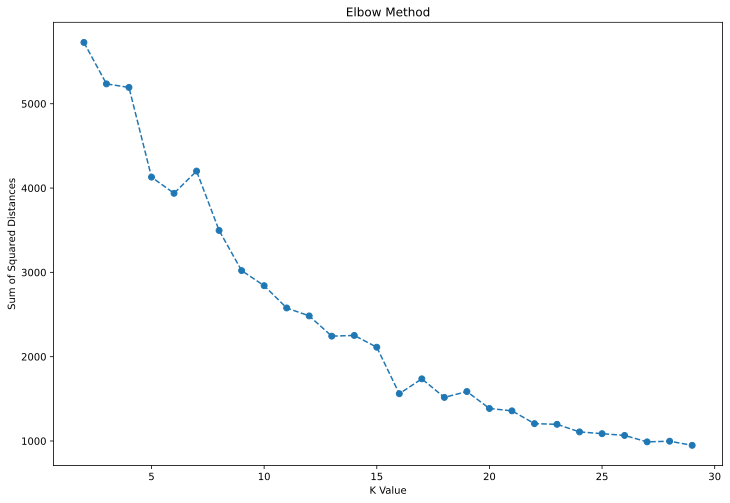

In [75]:
plt.figure(figsize=(12,8))
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method")
plt.savefig("visualisations/elbow_method.svg")


### Visualizing the Change in SSD Between Clusters

We are plotting the difference in Sum of Squared Distances (SSD) between consecutive cluster counts. This bar plot helps us observe how much the SSD decreases as we increase the number of clusters, making it easier to identify the point where adding more clusters provides diminishing returns.

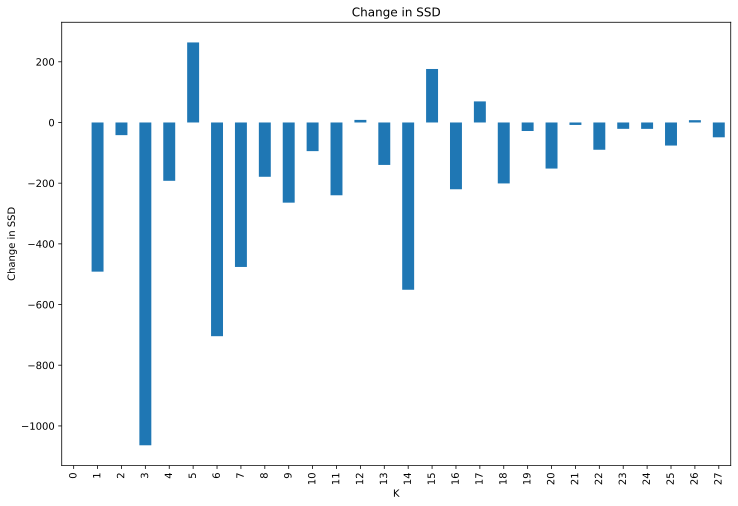

In [74]:
plt.figure(figsize=(12,8))
pd.Series(ssd).diff().plot(kind='bar')
plt.title("Change in SSD")
plt.xlabel("K")
plt.ylabel("Change in SSD")
plt.savefig("visualisations/change_in_ssd.svg")

-----

## Model Interpretation

We are now interpreting the results of our KMeans clustering analysis. Based on the "elbow" plot and the changes in Sum of Squared Distances (SSD), we are considering which value of K is most appropriate for our data. There may be multiple reasonable choices for K, and we are discussing the features that are most influential in defining these clusters. As this is an unsupervised learning problem, there is no single correct answer, and interpretation relies on both the data and domain knowledge.

-----

#### Example Interpretation: Choosing K=3

We are observing a significant drop in the difference of SSD at K=3, suggesting that three clusters may provide a meaningful grouping of the countries. Although the SSD continues to decrease beyond K=3, the rate of improvement slows, indicating diminishing returns with additional clusters.

For K=3, we are analyzing which features are most influential in driving the separation between clusters. This exploration will help us understand the underlying characteristics that define each group and provide insight into the patterns present in the data.

In [76]:
model = KMeans(n_clusters=3)
model.fit(scaled_X)

KMeans(n_clusters=3)

In [77]:
model.labels_

array([2, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2,
       2], dtype=int32)

In [78]:
X['K=3 Clusters'] = model.labels_

In [79]:
X.corr()['K=3 Clusters'].sort_values()

Phones (per 1000)                            -0.749932
GDP ($ per capita)                           -0.705611
Region_WESTERN EUROPE                        -0.477220
Service                                      -0.402078
Climate                                      -0.373840
Region_EASTERN EUROPE                        -0.320460
Literacy (%)                                 -0.289592
Net migration                                -0.282169
Region_BALTICS                               -0.164255
Region_NORTHERN AMERICA                      -0.164255
Pop. Density (per sq. mi.)                   -0.152150
Arable (%)                                   -0.133840
Region_0                                     -0.084847
Region_LATIN AMER. & CARIB                   -0.067668
Coastline (coast/area ratio)                 -0.056033
Region_OCEANIA                                0.012815
Area (sq. mi.)                                0.055326
Other (%)                                     0.079219
Population

------------
-------------

## Geographical Model Interpretation

**Create cluster labels for a chosen K value. Based on the solutions, we believe either K=3 or K=15 are reasonable choices. But feel free to choose differently and explore.**

In [106]:
model = KMeans(n_clusters=15)
    
model.fit(scaled_X)
    

KMeans(n_clusters=15)

### Real-World Application: Visualizing Clusters on a World Map

We are now taking our clustering results into a real-world context by visualizing the clusters on a country-level choropleth map. The objective is to display each country colored by its assigned cluster, providing a global view of the patterns discovered through KMeans clustering.

In [107]:
iso_codes = pd.read_csv("DATA/country_iso_codes.csv")

In [108]:
iso_codes.head()

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA


In [109]:
iso_mapping = iso_codes.set_index('Country')['ISO Code'].to_dict()

In [110]:
iso_mapping

{'Afghanistan': 'AFG',
 'Akrotiri and Dhekelia – See United Kingdom, The': 'Akrotiri and Dhekelia – See United Kingdom, The',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica\u200a[a]': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Ashmore and Cartier Islands – See Australia.': 'Ashmore and Cartier Islands – See Australia.',
 'Australia\u200a[b]': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas (the)': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia (Plurinational State of)': 'BOL',
 'Bonaire\xa0Sint Eustatius\xa0Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory (the)': 'IOT',
 'British V

In [111]:
df['ISO Code'] = df['Country'].map(iso_mapping)

In [112]:
df['Cluster'] = model.labels_

In [113]:
fig = px.choropleth(df, locations="ISO Code",
                    color="Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale='Turbo'
                    )
fig.show()

---